# 05 - Data Cleaning

## Import Package

In [1]:
# Import package as pandas does not ship along as native package
# use pip install pandas if not installed yet, or follow setup guide

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## A Simple Example: How many Pokemon are there for each type?

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std

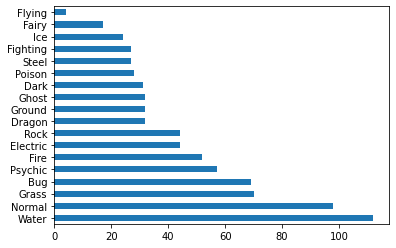

In [2]:
dataframe = pd.read_csv("../datasets/Pokemon.csv")
print(dataframe.head())
print(dataframe.describe())
print(dataframe["Type 1"].value_counts())
dataframe["Type 1"].value_counts().plot(kind="barh")
plt.show()

## Missing Value Injections

In [3]:
# set seed
np.random.seed(123)

# Injecting missing values
dataframe.Generation = dataframe.Generation.map(lambda x: np.nan)
dataframe.Attack = dataframe.Attack.map(
    lambda x: np.nan if np.random.rand() < 0.5 else x
)

## Missing Values Inspection

In [4]:
# Checking for missing values
dataframe.isnull()
dataframe.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack        396
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation    800
Legendary       0
dtype: int64

## Missing Values Imputation

In [5]:
# region Missing value imputation using specific values
df_filled_with_1 = dataframe.fillna(999)

In [6]:
df_filled_with_1.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [7]:
df_impute_string = dataframe.fillna("Null")

In [8]:
df_impute_string.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [9]:
df_mean_imputation = dataframe.Attack.fillna(dataframe.Attack.mean())
df_median_imputation = dataframe.Attack.fillna(dataframe.Attack.median())

In [10]:
# Missing value imputation using different values
# propagate non-null values forward
df_ffill = dataframe.fillna(method="ffill")

In [11]:
df_bfill = dataframe.fillna(method="bfill")

## Dropping Elements

In [12]:
# sometimes, some information might not be useful and we might want remove them
# dropping a column
dataframe.drop("Speed", axis=1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49.0,49,65,65,NaN,False
1,2,Ivysaur,Grass,Poison,405,60,NaN,63,80,80,NaN,False
2,3,Venusaur,Grass,Poison,525,80,NaN,83,100,100,NaN,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100.0,123,122,120,NaN,False
4,4,Charmander,Fire,NaN,309,39,52.0,43,60,50,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,NaN,150,100,150,NaN,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160.0,110,160,110,NaN,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,NaN,60,150,130,NaN,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,NaN,60,170,130,NaN,True


In [13]:
# dropping multiple columns
dataframe.drop(["Speed", "Sp. Atk", "Sp. Def", "Generation"], axis=1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49.0,49,False
1,2,Ivysaur,Grass,Poison,405,60,NaN,63,False
2,3,Venusaur,Grass,Poison,525,80,NaN,83,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100.0,123,False
4,4,Charmander,Fire,NaN,309,39,52.0,43,False
...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,NaN,150,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160.0,110,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,NaN,60,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,NaN,60,True


In [14]:
# dropping a row
dataframe.drop(0, axis=0)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,2,Ivysaur,Grass,Poison,405,60,NaN,63,80,80,60,NaN,False
2,3,Venusaur,Grass,Poison,525,80,NaN,83,100,100,80,NaN,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100.0,123,122,120,80,NaN,False
4,4,Charmander,Fire,NaN,309,39,52.0,43,60,50,65,NaN,False
5,5,Charmeleon,Fire,NaN,405,58,NaN,58,80,65,80,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,NaN,150,100,150,50,NaN,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160.0,110,160,110,110,NaN,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,NaN,60,150,130,70,NaN,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,NaN,60,170,130,80,NaN,True


In [15]:
# drop all rows with missing values
dataframe.dropna()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


## Practice Section

Perform the following steps to conduct a simple missing values inspection and imputation:
- Import the Pokemon dataset and bind it to another variable.
- Inspect the missing values of the dataset.
- Perform missing value imputation using a constant.
- Perform missing value imputation using mode of the column(s).
- Perform missing value imputation using forward fill method.
- Drop all the rows with missing value.

**Copyright (C) 2021  Lee Kian Yang**

This program is licensed under MIT license.